In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Project Overview

### Goal:
    - The goal of this project is to develop a simple model which can use simple customer features to accurately predict client churn. 

### Business Utility: 
    - Identifying clients at high risk of churn gives us actionable intelligence in two phases.
    
        - Potential Customer Identification: By being able to quantify which charateristics make a customer likely to stay or go we can more
        tailor our marketing efforts to attract customers who are more likely to remain customers.
        
        - Utilize targeted marketing and retainment efforts at current customers who are higher risk of churn.

### Methodology: 

    - We will be using a logistic regression model which classifies customers as secure (1), or likely to churn(0).
    - There a few advantages of this model and approach:
        - It is a simple model whcih can easily be tweaked or updated for future use.
        - It is cheap to both build and maintain. 
        - It is intuitive, we input non complicated data about clients (age, gender, credit score etc.) and are able to make predictions with accuracy. 

## Exploratory Data Analysis

### Import and high-level overview

In [16]:
# Import and preview our data set
df = pd.read_csv('/Users/elias_m/Desktop/Projects - pay me/Bank Churn/Bank Customer Churn Prediction.csv')

df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
# the following cells give us a high level overview, of the count, average and median of our dataset. 
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Visualizations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


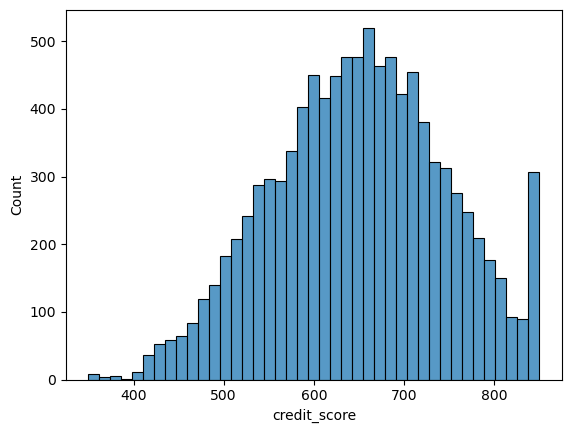

In [40]:
sns.histplot(x=df['credit_score'])
plt.show()

<Axes: xlabel='churn', ylabel='credit_score'>

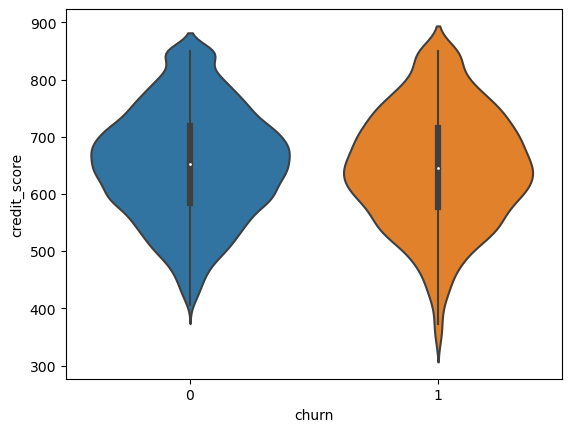

In [46]:
sns.violinplot(x='churn',y='credit_score',data = df)

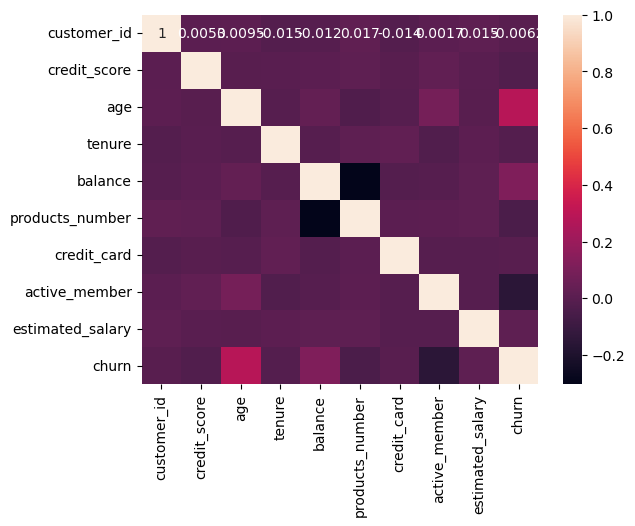

In [82]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

In [98]:
df.corr(numeric_only=True)['churn'].sort_values(ascending=False)

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

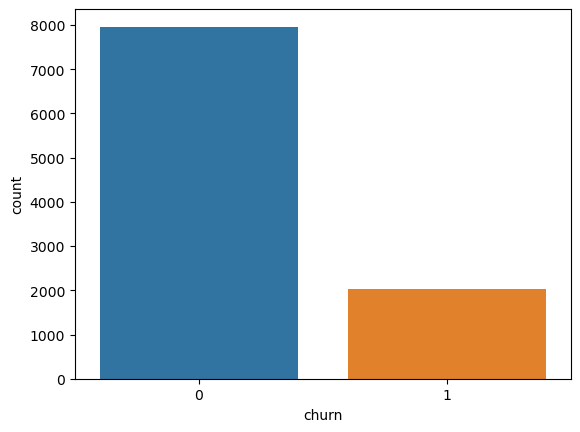

In [100]:
sns.countplot(data=df, x='churn')

<Axes: xlabel='churn', ylabel='age'>

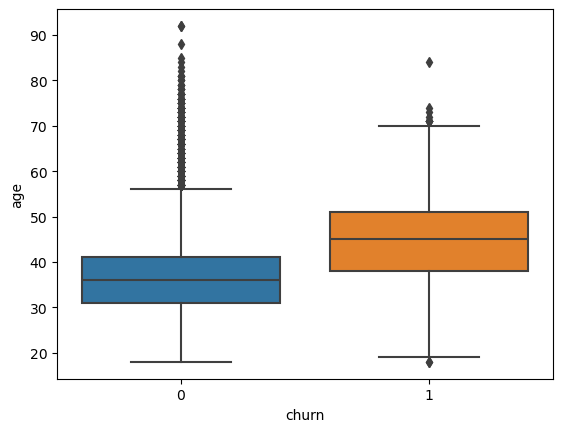

In [102]:
sns.boxplot(data=df,x='churn',y='age')

In [ ]:
# Here we seperate the data into sets of churned and non_churned customers

In [110]:
churned_df = df[df['churn']==1]

In [114]:
non_churned_df = df[df['churn']==0]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


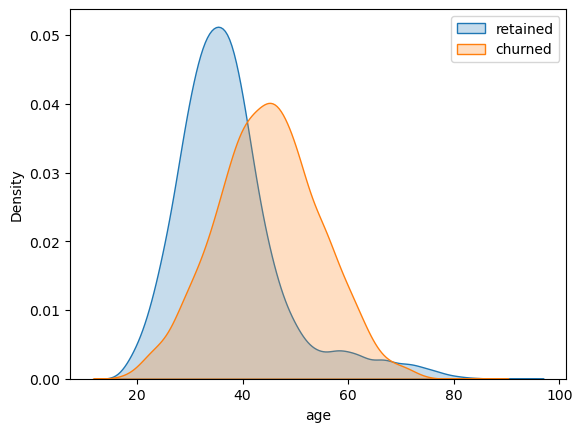

In [178]:
fig1,ax1 = plt.subplots()
sns.kdeplot(non_churned_df['age'],fill = True,ax=ax1,label='retained')
sns.kdeplot(churned_df['age'], fill = True,ax=ax1,label='churned')

ax1.legend()

plt.show()

### Exploration Summary

- The strongest indicator a customer will remain is account activity, followed by the number of products they have with us.
- Alarmingly, higher income and account balances are associated with higher churn.
- Age is the strongest predictor of churn, domain knowledge is need to evaluate the cause.

      - Questions:
          - Are customers passing away an explanation for age's correlation with churn?
          - Is this explained by income and account balance increasing with age?
          - Also, something that requires exploration is why increased balances and salary are increased with higher churn. Losing high value clients is an area of concern


## Model Implementation

### Data Transformation Pipeline

Before we can use it for our model our data must be transformed. We will scale our numerical values and one_hot_encode our categorical data. 

In [214]:
#Here we will import the tools needed for manipulating our data and implementing our model
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [206]:
# Separating our features from our target variables and splitting our data into training and testing sets

X = df.drop(['churn','customer_id'],axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [238]:

# For processing purposes we must identify our numerical and categorical features

categorical_columns = ['country', 'gender']
numerical_columns = ['credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary']



In [279]:
# frist we will construct our preprocessor, for scaling/encoding our numerical/categorical variables respectively

preprocessor = ColumnTransformer([
    ('num_columns',StandardScaler(),numerical_columns),
    ('cat_columns',OneHotEncoder(drop='first'),categorical_columns),
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
    ])


In [281]:
# now we will fit our training data

model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_columns',
                                                  StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat_columns',
                                                  OneHotEncoder(drop='first'),
                                                  ['country', 'gender'])])),
                ('classifier', LogisticRegression())])

In [283]:
y_pred = model.predict(X_test)

## Initial Model Performance

In [286]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [288]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.817

In [303]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1608
           1       0.60      0.20      0.30       392

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.60      2000
weighted avg       0.79      0.82      0.78      2000



Our model had an accuracy of 81%, however, our model was lacking in accurately predicting customers who did churn.
We will make a few tweaks and see if we can build a more accurate model. 

## Optimizing Model Accuracy by Adjusting Hyperparameters
Our model needs improvments. We will attempt to tune it by using a CV Grid Search to identify optimal hyperparemeters

In [331]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'classifier__penalty': ['l2','l1'],
    'classifier__C': [0.0001,0.001,0.05,0.1,1,10,100],
    'classifier__solver': ['liblinear']
    },
    {
        'classifier__penalty': ['elasticnet'],
        'classifier__C': [0.0001, 0.001, 0.05, 0.1, 1, 10, 100],
        'classifier__l1_ratio': [0.1, 0.25, 0.5, 0.9, 0.99],
        'classifier__solver': ['saga']
    }
        ]
        
gridsearch = GridSearchCV(estimator=model,param_grid=param_grid,cv=6, scoring='accuracy')

gridsearch.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_columns',
                                                                         StandardScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat_columns',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': [0.0001, 0.001, 0.05, 0.1, 1, 10,
                                            100],
                          'classifier__penalty': ['l2', 'l1'],
                          'classifier__solver': ['liblinear']},
                         {'classifier__C': [0.0001, 0.001, 0.05, 0.1, 1, 10,
                                            100],
                          'classifier__l1_ratio': [0.1, 0.25, 0.5, 0.9, 0.99],
                          'classifier__penalty': ['elasticnet'],
                          'classifier__solver': ['saga']}],
             scoring='accuracy')

In [335]:
gridsearch.best_params_

{'classifier__C': 0.1,
 'classifier__l1_ratio': 0.1,
 'classifier__penalty': 'elasticnet',
 'classifier__solver': 'saga'}